## Ecuaciones Diferenciales Parciales Hiperbólicas
#### Problema:

Aproxime la solución a la ecuación de onda:


$$\frac{\partial^2u}{\partial t^2}-\frac{\partial^2u}{\partial x^2} = 0,  \quad 0 \leq x \leq 1;$$

Con las siguientes condiciones: $$u(x,0) = sen(2\pi x);$$

$$u(0,t)=u(1,t)=0$$

$$\frac{\partial u}{\partial t}(x,0) = 2 \pi cos(2 \pi x), \; \quad 0 \leq x \leq 1;$$

Use el método de diferencias finitas y grafique la onda en tres dimensiones para diferentes tiempos.

#### Solución:

In [30]:
# librerías necesarias
import numpy as np
from archivos.latex_archivos import ltx_matriz
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [21]:
# Inicialización de variables
Δx = 0.1 # valor que asumieremos 
Δt = 0.05 # valor que asumieremos 

t0 = 0  # valor inferior de t
tf = 3  # valor superior de t   * valor asumido ya que no nos lo dan
x0 = 0  # valor inferior de x
xf = 1  # valor superior de x

c2 = 1 # coeficiente del término cuadrático  de x

# Valores que definen la frontera

uxI = lambda x: np.sin(2 * np.pi * x)  # función inicial de x

utI = 0  # valor inferior de t
utS = 0  # valor superior de t

gx = lambda x: 2 * np.pi * np.cos(2 * np.pi * x)  # función inicial de x

Revisión de los $\Delta$ iniciales:

In [22]:
c = np.sqrt(c2)
cvg = Δx / c
λ = (c *  Δt / (Δx)) ** 2
convergencia = "Hay convergencia" if cvg > Δt else "No hay convergencia, cambie el valor de Δt"  
convergencia

'Hay convergencia'

Cálculo de la matriz inicial:

In [23]:
n = int((xf - x0) / Δx + 1)  # número de filas de la matriz
m = int((tf - t0) / Δt + 1)  # número de columnas

x = np.arange(x0, xf + Δx, Δx)
t = np.arange(t0, tf + Δt, Δt)

a = np.zeros([n, m])
b = np.zeros([n, m])

# matriz exterior  
for i in range(n):
    a[i, 0] = uxI(x[i])     
    
for i in range(m):
    a[0, i] = utI

for i in range(m):
    a[-1, i] = utS

In [24]:
for i in range(n - 2):
    a[i + 1, 1] = a[i + 1, 0] + gx(x[i + 1]) * Δt + (λ / 2) * x[i + 1] * (a[i, 0] - 2 * a[i + 1, 0] + a[i + 2, 0])  
ltx_matriz(np.round(a,5),"Minicial")

<IPython.core.display.Math object>

Iterraciones:

In [25]:
for j in range(m - 2):
    for i in range(n - 2):
        a[i + 1, j + 2 ] = 2 * (1 - λ) * a[i + 1, j + 1] + λ * (a[i + 2, j + 1] + a[i, j + 1]) - a[i + 1, j]

ltx_matriz(np.round(a,4),"Msol")

<IPython.core.display.Math object>

Gráfico:

In [28]:
T, X = np.meshgrid(t, x)
a = a[:: -1]

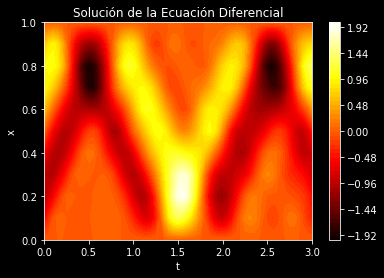

In [29]:
plt.contourf(T, X, a, 50, cmap = 'hot')
plt.title("Solución de la Ecuación Diferencial")
plt.xlabel('t')
plt.ylabel('x')
plt.colorbar()